# Project on Airquality data set
### BY:
         Arvind Sandhu_180010130023
         

In [1]:
import os
os.getcwd()

'C:\\Users\\Sandhu\\Desktop\\Python Codes'

In [2]:
os.chdir("C:/Users/Sandhu/Desktop/Data Sets")

In [3]:
os.getcwd()

'C:\\Users\\Sandhu\\Desktop\\Data Sets'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('airquality.csv')

In [6]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [7]:
df["Ozone"].isna().sum()

37

In [8]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [9]:
df.info

<bound method DataFrame.info of      Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9    3

[153 rows x 6 columns]>

As we can see there are Nan values in our data,so firstly we have to impute it with mean/mode/meadian
Here i am using mean imputation.
But before that we have tpo Check for abnormalities/outliers in our data.

In [10]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.627451
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.848790
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


## Handling Outliers

<AxesSubplot:xlabel='Ozone'>

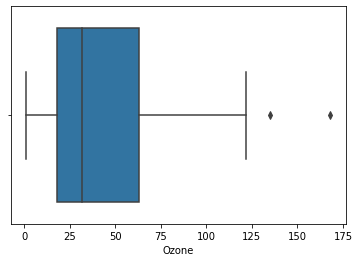

In [11]:
sns.boxplot(data=df,x=df['Ozone'])

 Here we can clearly see those dark spots on the right of upper whisker,those are anomalies/outliers.
so before imputation,we have to remove outliers for a consistent result.

In [12]:
#Outliers treatment

Q1=df['Ozone'].quantile(0.25)
Q3=df['Ozone'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5* IQR
Upper_Whisker = Q3 + 1.5* IQR
print(Lower_Whisker, Upper_Whisker)

18.0
63.25
45.25
-49.875 131.125


In [13]:
#Outlier Treatment
#Apply conditions to remove outliers
df = df[df['Ozone'] < Upper_Whisker]
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
5,28.0,NaN,14.9,66,5,6
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [14]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,114.000000,109.000000,114.000000,114.000000,114.000000,114.000000
mean,40.210526,183.541284,9.969298,77.789474,7.192982,15.342105
std,29.786103,91.483102,3.511527,9.546786,1.486679,8.646273
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,112.000000,7.400000,71.000000,6.000000,8.000000
50%,30.500000,203.000000,9.700000,79.000000,7.000000,16.000000
75%,60.500000,255.000000,11.500000,85.000000,8.750000,21.750000
max,122.000000,334.000000,20.700000,97.000000,9.000000,31.000000


<AxesSubplot:xlabel='Ozone'>

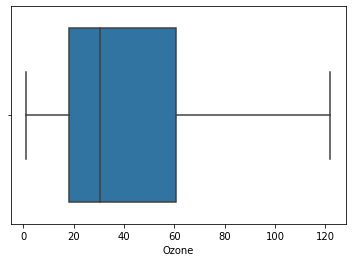

In [15]:
sns.boxplot(data=df,x=df['Ozone'])

So the outliers are successfully handled.
Lets check for anomalies in Wind values also

<AxesSubplot:xlabel='Wind'>

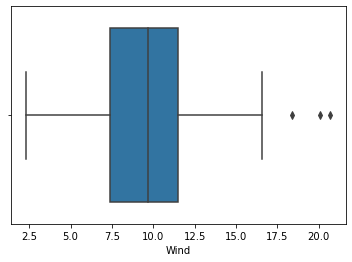

In [16]:
sns.boxplot(data=df,x=df['Wind'])

In [17]:
#Dealing with outliers.
Q1=df['Wind'].quantile(0.25)
Q3=df['Wind'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5* IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

7.4
11.5
4.1
1.2500000000000009 17.65


In [18]:
df = df[df['Wind'] < Upper_Whisker]
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,106.000000,111.000000,111.000000,111.000000,111.000000
mean,40.837838,185.141509,9.705405,78.180180,7.243243,15.360360
std,29.847047,90.253235,3.157670,9.310012,1.472266,8.737373
min,1.000000,7.000000,2.300000,58.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,71.500000,6.000000,8.000000
50%,31.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,62.000000,254.750000,11.500000,85.000000,9.000000,22.000000
max,122.000000,334.000000,16.600000,97.000000,9.000000,31.000000


<AxesSubplot:xlabel='Wind'>

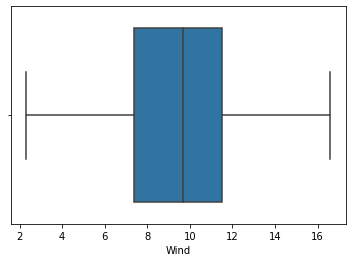

In [19]:
sns.boxplot(data=df,x=df["Wind"])

In [20]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Ozone      0
Solar.R    5
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

So here we can see that there are 5 "Nan" values in Solar.R feature.

## Null value removal

In [21]:
features = df.iloc[0:,:].values

In [22]:
features

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  62. ,   5. ,  20. ],
       [  1. ,   8. ,   9.7,  59. ,   5. ,  21. ],
       [ 11. , 320. ,  16.6,  73. ,   5. ,  22. ],
       [  4. ,  25. ,   9.7,  61. ,   5. ,  23. ],
       [ 32. ,  92. ,  12. ,  6

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(features[:,[1]])
features[:,[1]] = imputer.fit_transform(features[:,[1]])

In [24]:
features

array([[ 41.        , 190.        ,   7.4       ,  67.        ,
          5.        ,   1.        ],
       [ 36.        , 118.        ,   8.        ,  72.        ,
          5.        ,   2.        ],
       [ 12.        , 149.        ,  12.6       ,  74.        ,
          5.        ,   3.        ],
       [ 18.        , 313.        ,  11.5       ,  62.        ,
          5.        ,   4.        ],
       [ 28.        , 185.14150943,  14.9       ,  66.        ,
          5.        ,   6.        ],
       [ 23.        , 299.        ,   8.6       ,  65.        ,
          5.        ,   7.        ],
       [ 19.        ,  99.        ,  13.8       ,  59.        ,
          5.        ,   8.        ],
       [  7.        , 185.14150943,   6.9       ,  74.        ,
          5.        ,  11.        ],
       [ 16.        , 256.        ,   9.7       ,  69.        ,
          5.        ,  12.        ],
       [ 11.        , 290.        ,   9.2       ,  66.        ,
          5.        ,  13. 

In [25]:
df1 = pd.DataFrame(features)
df1

,0,1,2,3,4,5
0,41.0,190.000000,7.4,67.0,5.0,1.0
1,36.0,118.000000,8.0,72.0,5.0,2.0
2,12.0,149.000000,12.6,74.0,5.0,3.0
3,18.0,313.000000,11.5,62.0,5.0,4.0
4,28.0,185.141509,14.9,66.0,5.0,6.0
...,...,...,...,...,...,...
106,14.0,20.000000,16.6,63.0,9.0,25.0
107,30.0,193.000000,6.9,70.0,9.0,26.0
108,14.0,191.000000,14.3,75.0,9.0,28.0
109,18.0,131.000000,8.0,76.0,9.0,29.0


In [26]:
df1.apply(lambda x:sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

<AxesSubplot:>

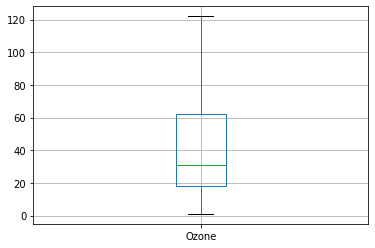

In [27]:
df.boxplot("Ozone")

<AxesSubplot:xlabel='Ozone'>

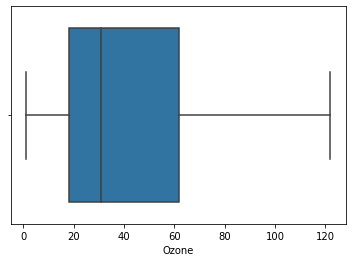

In [28]:
sns.boxplot(data=df,x=df["Ozone"])

In [29]:
ozone=df1[0]
ozone

0      41.0
1      36.0
2      12.0
3      18.0
4      28.0
       ... 
106    14.0
107    30.0
108    14.0
109    18.0
110    20.0
Name: 0, Length: 111, dtype: float64

In [30]:
solarR=df1[1]
solarR

0      190.000000
1      118.000000
2      149.000000
3      313.000000
4      185.141509
          ...    
106     20.000000
107    193.000000
108    191.000000
109    131.000000
110    223.000000
Name: 1, Length: 111, dtype: float64

In [31]:
wind=df1[2]
wind

0       7.4
1       8.0
2      12.6
3      11.5
4      14.9
       ... 
106    16.6
107     6.9
108    14.3
109     8.0
110    11.5
Name: 2, Length: 111, dtype: float64

In [32]:
temp=df1[3]
temp

0      67.0
1      72.0
2      74.0
3      62.0
4      66.0
       ... 
106    63.0
107    70.0
108    75.0
109    76.0
110    68.0
Name: 3, Length: 111, dtype: float64

In [33]:
month=df1[4]
month

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
106    9.0
107    9.0
108    9.0
109    9.0
110    9.0
Name: 4, Length: 111, dtype: float64

In [34]:
day=df1[5]
day

0       1.0
1       2.0
2       3.0
3       4.0
4       6.0
       ... 
106    25.0
107    26.0
108    28.0
109    29.0
110     3.0
Name: 5, Length: 111, dtype: float64

Lets plot our data on scatter plot for further study.

Text(0.5, 0, 'Solar.R')

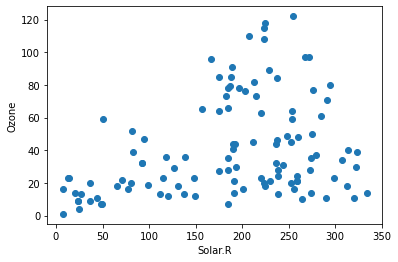

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(solarR,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Solar.R")

Here we can see that ozone depletion is low when solar radiation are low,and as the intensity of solar radiation increases to the right,ozone depletion is affect at large.
so we can assume that Solar Radiation has a + co relation with solar radiation.

Text(0.5, 0, 'Wind')

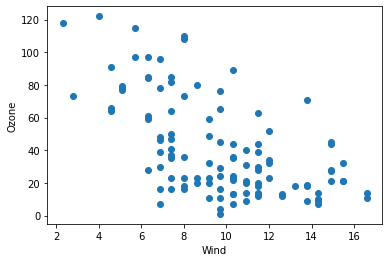

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(wind,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Wind")

here we can see that at slower wind,solar depletion is high as compared to when wind is fast,the density of scaterness increses with inc in wind speed and we can assume that it has a -ve corr .

Text(0.5, 0, 'Temp')

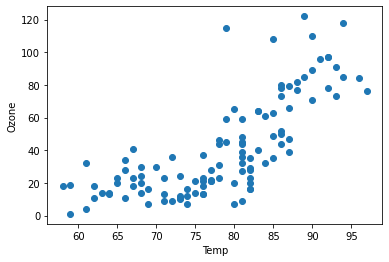

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(temp,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Temp")

Text(0.5, 0, 'Month')

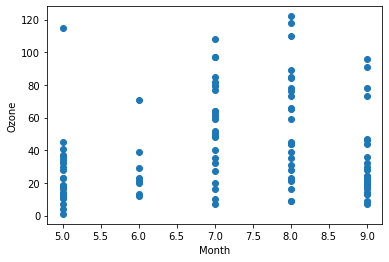

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(month,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Month")

Text(0.5, 0, 'Day')

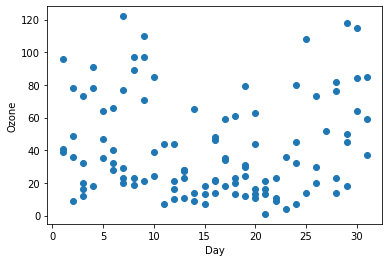

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(day,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Day")

#Lets study first the trend of ozone depletion with Other predictors and try make a predictive model

In [40]:
df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.326011,-0.590170,0.747594,0.141585,0.005769
Solar.R,0.326011,1.000000,-0.073419,0.259149,-0.115142,-0.076747
Wind,-0.590170,-0.073419,1.000000,-0.469268,-0.129152,0.068960
Temp,0.747594,0.259149,-0.469268,1.000000,0.388085,-0.081383
Month,0.141585,-0.115142,-0.129152,0.388085,1.000000,-0.050692
Day,0.005769,-0.076747,0.068960,-0.081383,-0.050692,1.000000


<AxesSubplot:>

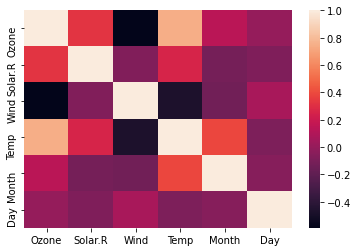

In [41]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

### Lets start building predictive model with Temp.

In [42]:
mean_ozone=df["Ozone"].mean()
mean_ozone

40.83783783783784

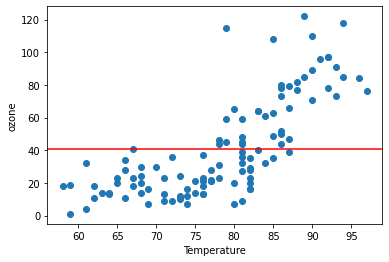

In [43]:
plt.plot(temp,ozone,'o')
plt.ylabel("ozone")
plt.xlabel("Temperature")
plt.axhline(mean_ozone, color='r', linestyle='-')
plt.show()

In [44]:
#odinary least square OLS methods
import statsmodels.api as sm

In [45]:
model=sm.OLS(ozone,temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              298.4
Date:                Mon, 05 Jul 2021   Prob (F-statistic):                    4.12e-33
Time:                        18:55:18   Log-Likelihood:                         -520.05
No. Observations:                 111   AIC:                                      1042.
Df Residuals:                     110   BIC:                                      1045.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3              0.5483      0.032     17.274      0.000       0.485       0.611
==============================================================================
Omnibus:                       16.401   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.271
Skew:                           1.013   Prob(JB):                     6.54e-05
Kurtosis:                       3.253   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Sandhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temp', ylabel='Density'>

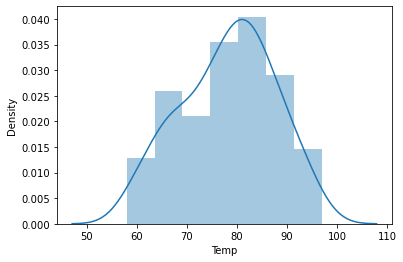

In [46]:
sns.distplot(df['Temp'])

<AxesSubplot:xlabel='Temp', ylabel='Ozone'>

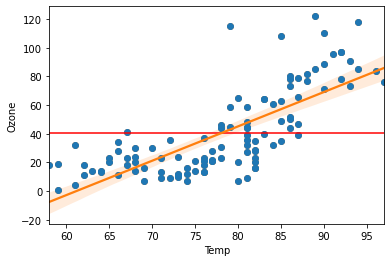

In [47]:
#Plot a regression line
plt.plot(temp,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Temperature")
plt.axhline(mean_ozone, color='r', linestyle='-')
sns.regplot(x='Temp', y='Ozone', data=df)

In [48]:
#Split up the data into 'x' array that contains the features to train on and 'y' array with the target variable
x=df['Temp']
y=df['Ozone']

In [49]:
x

0      67
1      72
2      74
3      62
5      66
       ..
147    63
148    70
150    75
151    76
152    68
Name: Temp, Length: 111, dtype: int64

In [50]:
y

0      41.0
1      36.0
2      12.0
3      18.0
5      28.0
       ... 
147    14.0
148    30.0
150    14.0
151    18.0
152    20.0
Name: Ozone, Length: 111, dtype: float64

In [51]:
# Split the data into Training set and Test set

#train_test_split splits arrays or matrices into random train and test subsets. 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state =1) 

#random_state=some_number,guarantees that the output of Run 1 will be equal to the output of Run 2, 
# i.e. split will be always the same.

In [52]:
x_train

62     85
146    69
23     61
152    68
43     82
       ..
12     66
110    78
15     64
148    70
68     92
Name: Temp, Length: 77, dtype: int64

In [53]:
y_train

62     49.0
146     7.0
23     32.0
152    20.0
43     23.0
       ... 
12     11.0
110    31.0
15     14.0
148    30.0
68     97.0
Name: Ozone, Length: 77, dtype: float64

In [54]:
x_train.shape

(77,)

In [55]:
y_train.shape

(77,)

In [56]:
x_train = x_train.values.reshape((-1,1))

In [57]:
x_train.shape

(77, 1)

In [58]:
x_train

array([[85],
       [69],
       [61],
       [68],
       [82],
       [88],
       [87],
       [89],
       [86],
       [81],
       [96],
       [73],
       [94],
       [87],
       [92],
       [76],
       [83],
       [78],
       [71],
       [66],
       [86],
       [62],
       [76],
       [81],
       [82],
       [84],
       [82],
       [86],
       [87],
       [75],
       [81],
       [82],
       [79],
       [71],
       [86],
       [81],
       [62],
       [73],
       [76],
       [85],
       [93],
       [69],
       [86],
       [67],
       [68],
       [81],
       [79],
       [85],
       [89],
       [74],
       [63],
       [66],
       [80],
       [71],
       [68],
       [65],
       [77],
       [58],
       [93],
       [61],
       [67],
       [85],
       [90],
       [59],
       [76],
       [79],
       [72],
       [59],
       [90],
       [94],
       [65],
       [72],
       [66],
       [78],
       [64],
       [70],
       [92]]

In [59]:
y_train

62     49.0
146     7.0
23     32.0
152    20.0
43     23.0
       ... 
12     11.0
110    31.0
15     14.0
148    30.0
68     97.0
Name: Ozone, Length: 77, dtype: float64

In [60]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x_train,y_train) 

In [61]:
accuracy = model.score(x_train, y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.5891497523190505


In [62]:
model

LinearRegression()

In [63]:
x_test

131    75
77     82
91     81
123    91
107    77
143    64
139    67
93     81
66     83
69     92
100    90
132    73
2      74
140    76
145    81
88     88
138    78
135    77
130    78
75     80
112    77
21     73
119    97
89     86
129    80
63     81
104    82
81     74
79     87
128    84
50     76
90     83
94     82
13     68
Name: Temp, dtype: int64

In [64]:
x_test.shape

(34,)

In [65]:
x_test = x_test.values.reshape((-1,1))

In [66]:
x_test

array([[75],
       [82],
       [81],
       [91],
       [77],
       [64],
       [67],
       [81],
       [83],
       [92],
       [90],
       [73],
       [74],
       [76],
       [81],
       [88],
       [78],
       [77],
       [78],
       [80],
       [77],
       [73],
       [97],
       [86],
       [80],
       [81],
       [82],
       [74],
       [87],
       [84],
       [76],
       [83],
       [82],
       [68]], dtype=int64)

In [67]:
predictions = model.predict(x_test)
print('predicted ozone Depletion:',predictions, sep = '\n')

predicted ozone Depletion:
[36.90507198 53.11137577 50.79618952 73.94805208 41.53544449 11.43802317
 18.38358193 50.79618952 55.42656203 76.26323834 71.63286582 32.27469947
 34.58988573 39.22025824 50.79618952 67.00249331 43.85063075 41.53544449
 43.85063075 48.48100326 41.53544449 32.27469947 87.83916962 62.3721208
 48.48100326 50.79618952 53.11137577 34.58988573 64.68730706 57.74174829
 39.22025824 55.42656203 53.11137577 20.69876819]


In [68]:
y_test

131     21.0
77      35.0
91      59.0
123     96.0
107     22.0
143     13.0
139     18.0
93       9.0
66      40.0
69      97.0
100    110.0
132     24.0
2       12.0
140     13.0
145     36.0
88      82.0
138     46.0
135     28.0
130     23.0
75       7.0
112     21.0
21      11.0
119     76.0
89      50.0
129     20.0
63      32.0
104     28.0
81      16.0
79      79.0
128     32.0
50      13.0
90      64.0
94      16.0
13      14.0
Name: Ozone, dtype: float64

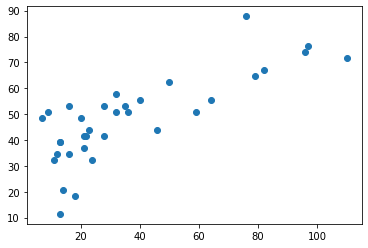

In [69]:
plt.scatter(y_test, predictions)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
x_train = x_train.reshape(-1,1)
y_train_prediction = model.predict(x_train)

x_test = x_test.reshape(-1,1)
y_test_prediction = model.predict(x_test)

In [71]:
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is : ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [2.31518626]
Intercept: -136.7338972242935


The model performance for training set
--------------------------------------
RMSE is 19.331836188461722
R2 score is 0.5891497523190505


The model performance for testing set
--------------------------------------
RMSE is :  21.569272722743573
R2 score:  0.4202541264238361


Text(0, 0.5, 'Ozone')

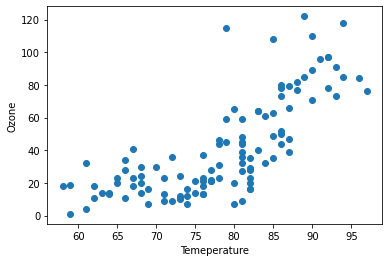

In [72]:
# plotting values

# data points
plt.scatter(x, y)
plt.xlabel('Temeperature')
plt.ylabel('Ozone')

In [73]:
x= x.values.reshape(-1,1)
y_predicted = model.predict(x)

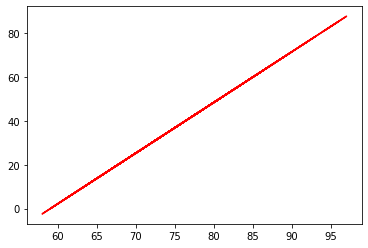

In [74]:
# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

# #Lets now study ozone trend with Solar radiation 

In [75]:
df1.apply(lambda x:sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

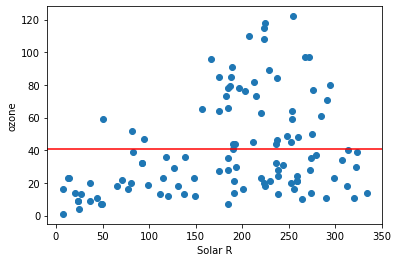

In [76]:
plt.plot(solarR,ozone,'o')
plt.ylabel("ozone")
plt.xlabel("Solar R")
plt.axhline(mean_ozone, color='r', linestyle='-')
plt.show()

C:\Users\Sandhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

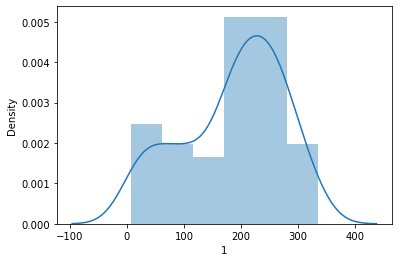

In [77]:
sns.distplot(df1[1])

In [78]:
#odinary least square OLS methods
import statsmodels.api as sm

In [79]:
model1=sm.OLS(ozone,solarR).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              212.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):                    2.06e-27
Time:                        18:55:30   Log-Likelihood:                         -533.24
No. Observations:                 111   AIC:                                      1068.
Df Residuals:                     110   BIC:                                      1071.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.2000      0.014     14.560      0.000       0.173       0.227
==============================================================================
Omnibus:                        3.498   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.418
Skew:                           0.380   Prob(JB):                        0.181
Kurtosis:                       2.597   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='1', ylabel='0'>

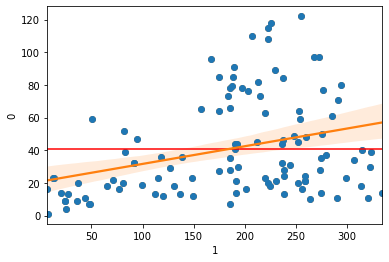

In [80]:
#Plot a regression line
plt.plot(solarR,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Solar Radiation")
plt.axhline(mean_ozone, color='r', linestyle='-')
sns.regplot(x=solarR, y=ozone, data=df1)

In [81]:
#Split up the data into 'x' array that contains the features to train on and 'y' array with the target variable
x1=df1[1]
y1=df1[0]

In [82]:
x1

0      190.000000
1      118.000000
2      149.000000
3      313.000000
4      185.141509
          ...    
106     20.000000
107    193.000000
108    191.000000
109    131.000000
110    223.000000
Name: 1, Length: 111, dtype: float64

In [83]:
y1

0      41.0
1      36.0
2      12.0
3      18.0
4      28.0
       ... 
106    14.0
107    30.0
108    14.0
109    18.0
110    20.0
Name: 0, Length: 111, dtype: float64

In [84]:
# Split the data into Training set and Test set

#train_test_split splits arrays or matrices into random train and test subsets. 
from sklearn.model_selection import train_test_split 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=0.3,random_state =1) 

#random_state=some_number,guarantees that the output of Run 1 will be equal to the output of Run 2, 
# i.e. split will be always the same.

In [85]:
x1_train

32     248.0
105     49.0
19      92.0
110    223.0
27     148.0
       ...  
9      290.0
72     244.0
12     334.0
107    193.0
37     267.0
Name: 1, Length: 77, dtype: float64

In [86]:
y1_train

32     49.0
105     7.0
19     32.0
110    20.0
27     23.0
       ... 
9      11.0
72     31.0
12     14.0
107    30.0
37     97.0
Name: 0, Length: 77, dtype: float64

In [87]:
x1_train.shape

(77,)

In [88]:
y1_train.shape

(77,)

In [89]:
x1_train = x1_train.values.reshape((-1,1))

In [90]:
x1_train.shape

(77, 1)

In [91]:
x1_train

array([[248.        ],
       [ 49.        ],
       [ 92.        ],
       [223.        ],
       [148.        ],
       [276.        ],
       [ 95.        ],
       [175.        ],
       [192.        ],
       [236.        ],
       [237.        ],
       [264.        ],
       [188.        ],
       [185.14150943],
       [197.        ],
       [279.        ],
       [175.        ],
       [190.        ],
       [112.        ],
       [185.14150943],
       [215.        ],
       [ 44.        ],
       [259.        ],
       [175.        ],
       [ 81.        ],
       [285.        ],
       [201.        ],
       [ 82.        ],
       [323.        ],
       [191.        ],
       [260.        ],
       [127.        ],
       [ 51.        ],
       [ 14.        ],
       [294.        ],
       [252.        ],
       [313.        ],
       [120.        ],
       [131.        ],
       [220.        ],
       [189.        ],
       [256.        ],
       [185.14150943],
       [190

In [92]:
y1_train

32     49.0
105     7.0
19     32.0
110    20.0
27     23.0
       ... 
9      11.0
72     31.0
12     14.0
107    30.0
37     97.0
Name: 0, Length: 77, dtype: float64

In [93]:
from sklearn import linear_model as lm
model1=lm.LinearRegression()
results=model1.fit(x1_train,y1_train) 

In [94]:
accuracy = model1.score(x1_train, y1_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.12602219816627291


In [95]:
model1

LinearRegression()

In [96]:
x1_test

90     230.0
44     274.0
56     254.0
82     167.0
69      71.0
102    238.0
98     224.0
58      24.0
35     314.0
38     272.0
65     207.0
91     259.0
2      149.0
99      27.0
104    139.0
53     213.0
97     237.0
94     238.0
89     220.0
42      48.0
74     259.0
17     320.0
78     203.0
54     275.0
88     252.0
33     236.0
67     273.0
48       7.0
46     187.0
87      92.0
31     137.0
55     253.0
59      77.0
10     274.0
Name: 1, dtype: float64

In [97]:
x1_test.shape

(34,)

In [98]:
x1_test=x1_test.values.reshape((-1,1))

In [99]:
x_test

array([[75],
       [82],
       [81],
       [91],
       [77],
       [64],
       [67],
       [81],
       [83],
       [92],
       [90],
       [73],
       [74],
       [76],
       [81],
       [88],
       [78],
       [77],
       [78],
       [80],
       [77],
       [73],
       [97],
       [86],
       [80],
       [81],
       [82],
       [74],
       [87],
       [84],
       [76],
       [83],
       [82],
       [68]], dtype=int64)

In [100]:
predictions = model1.predict(x1_test)
print('predicted ozone Depletion:',predictions, sep = '\n')

predicted ozone Depletion:
[48.48381031 53.83471197 51.40248394 40.82229202 29.14759748 49.45670152
 47.7541419  23.43186162 58.69916802 53.59148916 45.68674807 52.01054095
 38.63328679 23.79669582 37.41717278 46.41641648 49.33509012 49.45670152
 47.26769629 26.35053525 52.01054095 59.42883643 45.20030247 53.95632337
 51.15926114 49.21347871 53.71310057 21.36446779 43.25452005 31.70143691
 37.17394998 51.28087254 29.87726589 53.83471197]


In [101]:
y1_test

90      21.0
44      35.0
56      59.0
82      96.0
69      22.0
102     13.0
98      18.0
58       9.0
35      40.0
38      97.0
65     110.0
91      24.0
2       12.0
99      13.0
104     36.0
53      82.0
97      46.0
94      28.0
89      23.0
42       7.0
74      21.0
17      11.0
78      76.0
54      50.0
88      20.0
33      32.0
67      28.0
48      16.0
46      79.0
87      32.0
31      13.0
55      64.0
59      16.0
10      14.0
Name: 0, dtype: float64

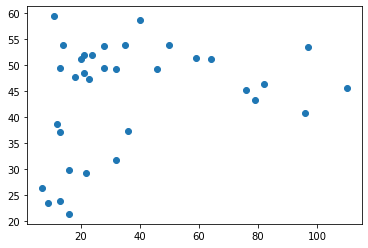

In [102]:
plt.scatter(y1_test, predictions)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
x1_train = x1_train.reshape(-1,1)
y1_train_prediction = model1.predict(x1_train)

x1_test = x1_test.reshape(-1,1)
y1_test_prediction = model1.predict(x1_test)

In [104]:
# printing values
print('Slope:' ,model1.coef_)
print('Intercept:', model1.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y1_train, y1_train_prediction)))
r2_training = r2_score(y1_train, y1_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y1_test, y1_test_prediction)))
r2_testing = r2_score(y1_test, y1_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is : ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [0.1216114]
Intercept: 20.513187982837223


The model performance for training set
--------------------------------------
RMSE is 28.195612344699946
R2 score is 0.12602219816627291


The model performance for testing set
--------------------------------------
RMSE is :  28.388940613445925
R2 score:  -0.004303636788868914


Text(0, 0.5, 'Ozone')

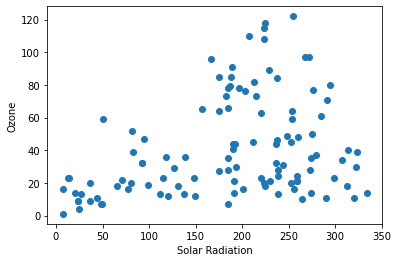

In [105]:
# plotting values

# data points
plt.scatter(x1, y1)
plt.xlabel('Solar Radiation')
plt.ylabel('Ozone')

In [107]:
x1= x1.values.reshape(-1,1)
y1_predicted = model1.predict(x1)

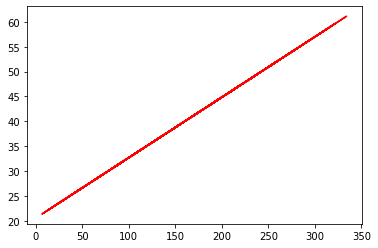

In [108]:
# predicted values
plt.plot(x1, y1_predicted, color='r')
plt.show()

# Now lets make a predictive model of Ozone with Wind

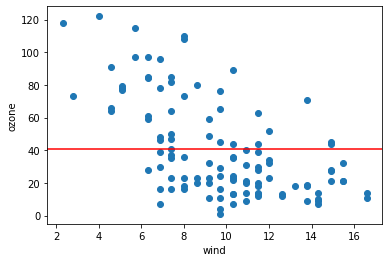

In [109]:
plt.plot(wind,ozone,'o')
plt.ylabel("ozone")
plt.xlabel("wind")
plt.axhline(mean_ozone, color='r', linestyle='-')
plt.show()

In [110]:
#odinary least square OLS methods
import statsmodels.api as sm

In [111]:
model2=sm.OLS(ozone,wind).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.434
Method:                 Least Squares   F-statistic:                              85.95
Date:                Mon, 05 Jul 2021   Prob (F-statistic):                    1.83e-15
Time:                        18:57:22   Log-Likelihood:                         -560.80
No. Observations:                 111   AIC:                                      1124.
Df Residuals:                     110   BIC:                                      1126.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2              3.2786      0.354      9.271      0.000       2.578       3.979
==============================================================================
Omnibus:                       11.720   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.273
Skew:                           0.840   Prob(JB):                      0.00131
Kurtosis:                       2.788   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# # Checking data normalisation(wind)

C:\Users\Sandhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2', ylabel='Density'>

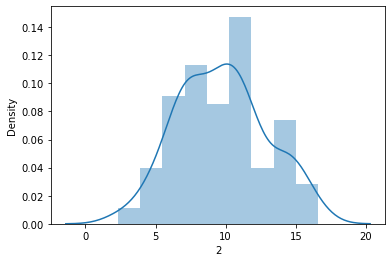

In [112]:
sns.distplot(df1[2])

<AxesSubplot:xlabel='2', ylabel='0'>

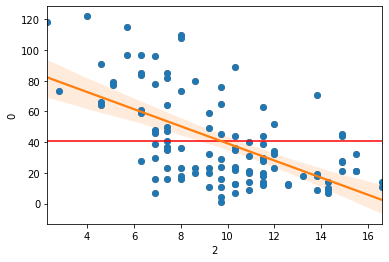

In [113]:
#Plot a regression line
plt.plot(wind,ozone,'o')
plt.ylabel("Ozone")
plt.xlabel("Wind")
plt.axhline(mean_ozone, color='r', linestyle='-')
sns.regplot(x=wind, y=ozone, data=df1)

In [114]:
#Split up the data into 'x' array that contains the features to train on and 'y' array with the target variable
x3=df1[2]
y3=df1[0]

In [115]:
x3

0       7.4
1       8.0
2      12.6
3      11.5
4      14.9
       ... 
106    16.6
107     6.9
108    14.3
109     8.0
110    11.5
Name: 2, Length: 111, dtype: float64

In [116]:
y3

0      41.0
1      36.0
2      12.0
3      18.0
4      28.0
       ... 
106    14.0
107    30.0
108    14.0
109    18.0
110    20.0
Name: 0, Length: 111, dtype: float64

In [117]:
### Split the data into Training set and Test set

#train_test_split splits arrays or matrices into random train and test subsets. 
from sklearn.model_selection import train_test_split 
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3,test_size=0.3,random_state =1) 

#random_state=some_number,guarantees that the output of Run 1 will be equal to the output of Run 2, 
# i.e. split will be always the same.

In [118]:
x3_train

32      9.2
105    10.3
19     12.0
110    11.5
27      8.0
       ... 
9       9.2
72     10.9
12     11.5
107     6.9
37      6.3
Name: 2, Length: 77, dtype: float64

In [119]:
y3_train

32     49.0
105     7.0
19     32.0
110    20.0
27     23.0
       ... 
9      11.0
72     31.0
12     14.0
107    30.0
37     97.0
Name: 0, Length: 77, dtype: float64

In [120]:
x3_train.shape

(77,)

In [121]:
y3_train.shape

(77,)

In [122]:
x3_train=x3_train.values.reshape((-1,1))

In [123]:
x3_train.shape

(77, 1)

In [124]:
x3_train

array([[ 9.2],
       [10.3],
       [12. ],
       [11.5],
       [ 8. ],
       [ 5.1],
       [ 7.4],
       [ 7.4],
       [11.5],
       [14.9],
       [ 6.3],
       [14.3],
       [ 6.3],
       [ 4.6],
       [ 5.1],
       [ 7.4],
       [ 4.6],
       [10.3],
       [11.5],
       [14.9],
       [ 8. ],
       [ 9.7],
       [15.5],
       [14.9],
       [ 8.6],
       [ 6.3],
       [ 8. ],
       [12. ],
       [11.5],
       [14.3],
       [ 6.9],
       [ 9.7],
       [ 6.3],
       [ 9.2],
       [ 8.6],
       [14.9],
       [11.5],
       [11.5],
       [ 8. ],
       [11.5],
       [ 4.6],
       [ 9.7],
       [ 6.9],
       [ 7.4],
       [10.3],
       [ 6.9],
       [ 5.7],
       [ 7.4],
       [ 4. ],
       [ 6.9],
       [16.6],
       [12. ],
       [ 9.7],
       [10.9],
       [11.5],
       [ 9.2],
       [14.9],
       [13.2],
       [ 2.8],
       [ 9.7],
       [12. ],
       [ 8. ],
       [13.8],
       [13.8],
       [ 7.4],
       [ 9.7],
       [ 8

In [125]:
y3_train

32     49.0
105     7.0
19     32.0
110    20.0
27     23.0
       ... 
9      11.0
72     31.0
12     14.0
107    30.0
37     97.0
Name: 0, Length: 77, dtype: float64

In [126]:
from sklearn import linear_model as lm
model2=lm.LinearRegression()
results=model2.fit(x3_train,y3_train) 

In [127]:
accuracy = model2.score(x3_train, y3_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.33344180011820324


In [128]:
#Print coefficients
print('intercept:', model2.intercept_)
print('slope:', model2.coef_)

intercept: 93.87770088069121
slope: [-5.40420883]


In [129]:
#Check model score
model2

LinearRegression()

In [130]:
x3_test

90     10.9
44     10.3
56      9.2
82      6.9
69     10.3
102    12.6
98     13.8
58     13.8
35     10.9
38      5.7
65      8.0
91      9.7
2      12.6
99     10.3
104    10.3
53      7.4
97      6.9
94      6.3
89     10.3
42     14.3
74     15.5
17     16.6
78      9.7
54      7.4
88     10.9
33      9.2
67     11.5
48      6.9
46      5.1
87     15.5
31     10.3
55      7.4
59      7.4
10     10.9
Name: 2, dtype: float64

In [131]:
x3_test.shape

(34,)

In [132]:
x3_test=x3_test.values.reshape((-1,1))

In [133]:
x3_test.shape

(34, 1)

In [134]:
#Predictions from the model
predictions = model2.predict(x3_test)
print('predicted O.ring.failures:',predictions, sep = '\n')

predicted O.ring.failures:
[34.97182464 38.21434993 44.15897965 56.58865996 38.21434993 25.78466963
 19.29961903 19.29961903 34.97182464 63.07371055 50.64403024 41.45687523
 25.78466963 38.21434993 38.21434993 53.88655554 56.58865996 59.83118525
 38.21434993 16.59751461 10.11246402  4.16783431 41.45687523 53.88655554
 34.97182464 44.15897965 31.72929934 56.58865996 66.31623585 10.11246402
 38.21434993 53.88655554 53.88655554 34.97182464]


In [135]:
y3_test

90      21.0
44      35.0
56      59.0
82      96.0
69      22.0
102     13.0
98      18.0
58       9.0
35      40.0
38      97.0
65     110.0
91      24.0
2       12.0
99      13.0
104     36.0
53      82.0
97      46.0
94      28.0
89      23.0
42       7.0
74      21.0
17      11.0
78      76.0
54      50.0
88      20.0
33      32.0
67      28.0
48      16.0
46      79.0
87      32.0
31      13.0
55      64.0
59      16.0
10      14.0
Name: 0, dtype: float64

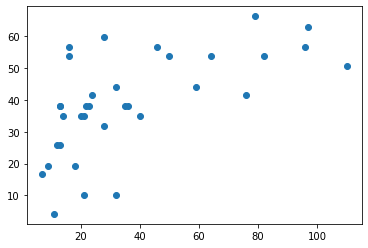

In [136]:
#Visualize the predictions
plt.scatter(y3_test, predictions)

In [139]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
x3_train = x3_train.reshape(-1,1)
y3_train_prediction = model2.predict(x3_train)

x3_test = x3_test.reshape(-1,1)
y3_test_prediction = model2.predict(x3_test)

In [140]:
# printing values
print('Slope:' ,model2.coef_)
print('Intercept:', model2.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y3_train, y3_train_prediction)))
r2_training = r2_score(y3_train, y3_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y3_test, y3_test_prediction)))
r2_testing = r2_score(y3_test, y3_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [-5.40420883]
Intercept: 93.87770088069121


The model performance for training set
--------------------------------------
RMSE is 24.62353309329056
R2 score is 0.33344180011820324


The model performance for testing set
--------------------------------------
Root mean squared error:  22.522797755978473
R2 score:  0.3678628167681699


Text(0, 0.5, 'Ozone')

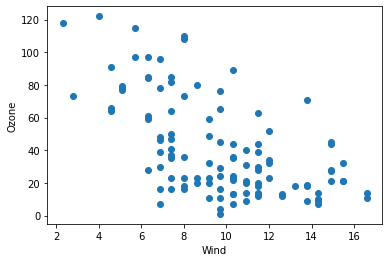

In [141]:
# plotting values

# data points
plt.scatter(x3, y3)
plt.xlabel('Wind')
plt.ylabel('Ozone')

In [143]:
x3= x3.values.reshape(-1,1)
y3_predicted = model2.predict(x3)

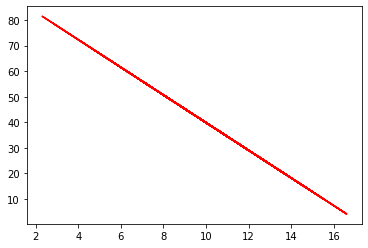

In [144]:
# predicted values
plt.plot(x3, y3_predicted, color='r')
plt.show()

# Multiple Linear Regression (Wind, Solar.R and Ozone)
  


In [145]:
X = df1[[1, 2]]
y = df1[0]

In [146]:
import statsmodels.api as sm

In [147]:
model3 = sm.OLS(y,X).fit()
predictions = model3.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.661
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              106.3
Date:                Mon, 05 Jul 2021   Prob (F-statistic):                    2.43e-26
Time:                        18:59:01   Log-Likelihood:                         -532.79
No. Observations:                 111   AIC:                                      1070.
Df Residuals:                     109   BIC:                                      1075.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.2209      0.026      8.460      0.000       0.169       0.273
2             -0.4935      0.524     -0.941      0.349      -1.533       0.546
==============================================================================
Omnibus:                        2.602   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.272
Skew:                           0.244   Prob(JB):                        0.321
Kurtosis:                       2.497   Cond. No.                         38.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1)

In [149]:
X_train

,1,2
54,275.0,7.4
88,252.0,10.9
33,236.0,9.2
67,273.0,11.5
48,7.0,6.9
...,...,...
9,290.0,9.2
72,244.0,10.9
12,334.0,11.5
107,193.0,6.9


In [150]:
y_train

54     50.0
88     20.0
33     32.0
67     28.0
48     16.0
       ... 
9      11.0
72     31.0
12     14.0
107    30.0
37     97.0
Name: 0, Length: 88, dtype: float64

In [151]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values

In [152]:
features

array([[275.        ,   7.4       ],
       [252.        ,  10.9       ],
       [236.        ,   9.2       ],
       [273.        ,  11.5       ],
       [  7.        ,   6.9       ],
       [187.        ,   5.1       ],
       [ 92.        ,  15.5       ],
       [137.        ,  10.3       ],
       [253.        ,   7.4       ],
       [ 77.        ,   7.4       ],
       [274.        ,  10.9       ],
       [248.        ,   9.2       ],
       [ 49.        ,  10.3       ],
       [ 92.        ,  12.        ],
       [223.        ,  11.5       ],
       [148.        ,   8.        ],
       [276.        ,   5.1       ],
       [ 95.        ,   7.4       ],
       [175.        ,   7.4       ],
       [192.        ,  11.5       ],
       [236.        ,  14.9       ],
       [237.        ,   6.3       ],
       [264.        ,  14.3       ],
       [188.        ,   6.3       ],
       [185.14150943,   4.6       ],
       [197.        ,   5.1       ],
       [279.        ,   7.4       ],
 

In [153]:
features.shape

(88, 2)

In [154]:
labels = y_train.iloc[:].values

In [155]:
labels

array([ 50.,  20.,  32.,  28.,  16.,  79.,  32.,  13.,  64.,  16.,  14.,
        49.,   7.,  32.,  20.,  23.,  77.,  47.,  85.,  44.,  44.,  84.,
        10.,  85.,  66.,  78.,  37.,  64.,  44.,  13.,  28.,  73.,  11.,
        21.,  27.,  20.,  61.,  16.,  52.,  39.,  14.,  48.,  29.,  59.,
        23.,  80.,  45.,  18.,  12.,  18.,  63.,  91.,  16.,  78.,  41.,
        24.,  39., 115.,  35., 122.,   7.,  14.,  34.,  65.,   9.,  30.,
        20.,  21.,  18.,  73.,   4.,  23., 108.,  71.,  19.,  23.,  45.,
        36.,   1.,  89., 118.,  23.,   9.,  11.,  31.,  14.,  30.,  97.])

In [156]:
labels.size

88

In [157]:
X=features
y=labels

In [158]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model3=lm.LinearRegression()
results=model3.fit(features,labels) 

In [159]:
predictions = model3.predict(X)

In [160]:
accuracy=model3.score(features,labels)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.40814123626188403


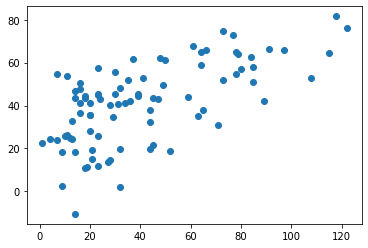

In [161]:
#Visualize the predictions
plt.scatter(y, predictions)

In [162]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model3.coef_)
print('Intercept:', model3.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [ 0.10085785 -4.9985162 ]
Intercept: 70.42836139881645


The model performance
--------------------------------------
RMSE is 22.57713553396693
R2 score is 0.40814123626188403


